In [17]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf

In [ ]:
train_dir = 'archive/train'
test_dir = 'archive/test'

In [ ]:
image_size = (48, 48)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# rescaling for validation and test sets
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical', 
    color_mode='grayscale' 
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size, 
    class_mode='categorical', 
    color_mode='grayscale'
)

print(train_generator.class_indices)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [ ]:
#CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\TANISHA\anaconda3\envs\new_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
epochs = 30  
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

Epoch 1/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.2470 - loss: 1.8220 - val_accuracy: 0.2533 - val_loss: 1.7774
Epoch 2/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 178s 198ms/step - accuracy: 0.2536 - loss: 1.7865 - val_accuracy: 0.2800 - val_loss: 1.7392
Epoch 3/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 142s 158ms/step - accuracy: 0.2647 - loss: 1.7653 - val_accuracy: 0.2988 - val_loss: 1.7104
Epoch 4/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 38s 43ms/step - accuracy: 0.2912 - loss: 1.7325 - val_accuracy: 0.3638 - val_loss: 1.5794
Epoch 5/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.3402 - loss: 1.6525 - val_accuracy: 0.4274 - val_loss: 1.4942
Epoch 6/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.3758 - loss: 1.5880 - val_accuracy: 0.4391 - val_loss: 1.4407
Epoch 7/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.3904 - loss: 1.5557 - val_accuracy: 0.4625 - val_loss: 1.4106
Epoch 8/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.4128 - loss: 1.519

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5507 - loss: 1.1632
Test Accuracy: 55.15%


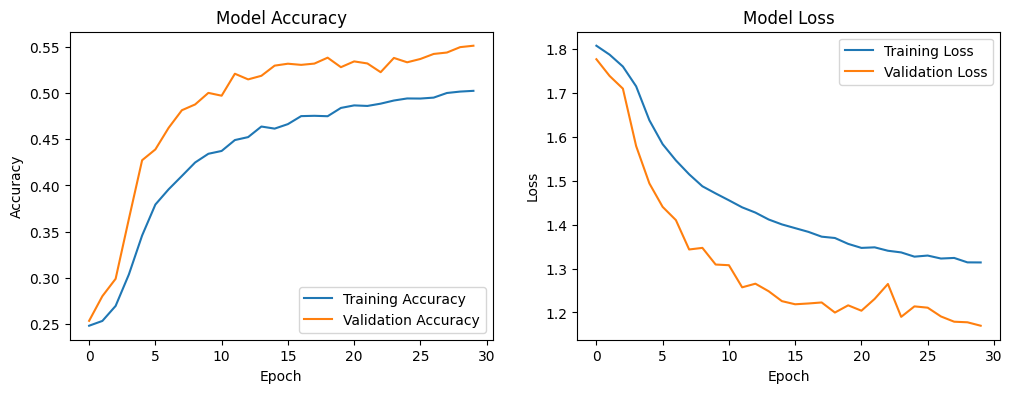

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.save('emotion_detector_model.h5')
print("Model saved successfully!")

Model saved successfully!
